In [1]:
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

import numpy as np

import matplotlib.pyplot as plt

# Convolutional Neural Network

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X = (mnist.data / 255).reshape(len(mnist.data), 28, 28, 1)
      # 좋은 결과를 위해 정규화 하기 위해 255로 나눔
y = to_categorical(mnist.target.astype(np.int),10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [8]:
hstr = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
490/490 - 174s - loss: 0.1873 - accuracy: 0.9428
Epoch 2/10
490/490 - 174s - loss: 0.0523 - accuracy: 0.9835
Epoch 3/10
490/490 - 174s - loss: 0.0372 - accuracy: 0.9889
Epoch 4/10
490/490 - 173s - loss: 0.0259 - accuracy: 0.9918
Epoch 5/10
490/490 - 173s - loss: 0.0234 - accuracy: 0.9922
Epoch 6/10
490/490 - 173s - loss: 0.0186 - accuracy: 0.9940
Epoch 7/10
490/490 - 173s - loss: 0.0153 - accuracy: 0.9951
Epoch 8/10
490/490 - 173s - loss: 0.0122 - accuracy: 0.9961
Epoch 9/10
490/490 - 173s - loss: 0.0124 - accuracy: 0.9957
Epoch 10/10
490/490 - 173s - loss: 0.0125 - accuracy: 0.9957


In [9]:
hstr.history['loss']

[0.18733547627925873,
 0.05234699323773384,
 0.037168238312006,
 0.025934506207704544,
 0.02336524985730648,
 0.018596531823277473,
 0.015296315774321556,
 0.012215221300721169,
 0.012406750582158566,
 0.012489152140915394]

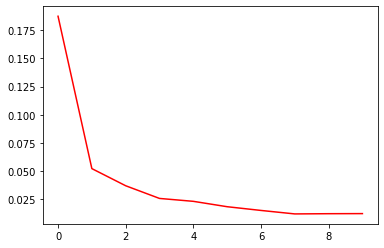

In [10]:
plt.plot(hstr.history['loss'], color ='red')
plt.show()

In [11]:
hstr.history['accuracy']

[0.9427551031112671,
 0.9834898114204407,
 0.988897979259491,
 0.9918367266654968,
 0.9922245144844055,
 0.9940407872200012,
 0.9951428771018982,
 0.996122419834137,
 0.9956530332565308,
 0.9956938624382019]

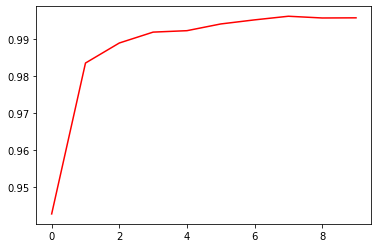

In [12]:
plt.plot(hstr.history['accuracy'], color ='red')
plt.show()

In [13]:
loss, acc = model.evaluate(X_test, y_test)

print('손실값 :',loss)
print('정확도 :',acc)

657/657 [==============================] - 21s 32ms/step - loss: 0.0267 - accuracy: 0.9925
손실값 : 0.026737816631793976
정확도 : 0.9924761652946472


In [14]:
y_pred = model.predict(X_test)

print(y_pred)

[[2.7160872e-13 2.2371329e-07 7.7298023e-07 ... 9.9996364e-01
  1.4148023e-09 2.8443947e-07]
 [2.8885267e-20 1.8474447e-12 6.9327526e-14 ... 1.7309177e-13
  4.8966977e-13 3.7087705e-13]
 [2.7044211e-16 1.8871814e-11 2.6858310e-10 ... 1.6743812e-08
  2.4301050e-10 6.7942901e-11]
 ...
 [2.3574778e-10 6.4376177e-10 1.0000000e+00 ... 2.0326683e-10
  5.2895820e-11 3.7048295e-11]
 [7.8629270e-08 1.4986837e-03 4.1566807e-05 ... 4.6973915e-07
  1.2296069e-03 5.9827214e-01]
 [3.9113487e-11 1.3998098e-11 1.8633974e-13 ... 7.9465753e-18
  4.2305881e-11 5.1108359e-15]]


In [21]:
y_pred_class = np.argmax(y_pred, axis=1) # 가장큰 값, 즉 0이 아닌 1인 값의 위치를 출력

print(y_pred_class)

[7 3 3 ... 2 9 6]


In [22]:
metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

array([[1989,    1,    4,    0,    0,    1,   10,    0,    4,    1],
       [   1, 2401,    4,    2,    2,    0,    1,    7,    0,    1],
       [   0,    1, 2108,    2,    0,    0,    0,    0,    1,    1],
       [   0,    0,    8, 2123,    0,    8,    0,    0,    4,    3],
       [   0,    0,    1,    0, 1960,    0,    2,    4,    0,    8],
       [   0,    0,    0,    3,    1, 1863,   10,    1,    1,    1],
       [   0,    1,    2,    1,    1,    3, 2089,    0,    0,    0],
       [   0,    4,    6,    0,    0,    1,    0, 2167,    0,    2],
       [   0,    0,    5,    1,    0,    0,    2,    0, 2075,    2],
       [   1,    0,    1,    7,    8,    7,    0,    4,    0, 2067]])